In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

fuel_econ=pd.read_csv('fuel-econ.csv')

fuel_econ.head(3)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5


In [5]:
fuel_econ.VClass.value_counts()

Midsize Cars        1188
Compact Cars        1122
Subcompact Cars      673
Large Cars           625
Minicompact Cars     321
Name: VClass, dtype: int64

In [9]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']


# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
vclasses

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);
fuel_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         3929 non-null   int64   
 1   make       3929 non-null   object  
 2   model      3929 non-null   object  
 3   year       3929 non-null   int64   
 4   VClass     3929 non-null   category
 5   drive      3929 non-null   object  
 6   trans      3929 non-null   object  
 7   fuelType   3929 non-null   object  
 8   cylinders  3929 non-null   int64   
 9   displ      3929 non-null   float64 
 10  pv2        3929 non-null   int64   
 11  pv4        3929 non-null   int64   
 12  city       3929 non-null   float64 
 13  UCity      3929 non-null   float64 
 14  highway    3929 non-null   float64 
 15  UHighway   3929 non-null   float64 
 16  comb       3929 non-null   float64 
 17  co2        3929 non-null   int64   
 18  feScore    3929 non-null   int64   
 19  ghgScore   3929 non-null   

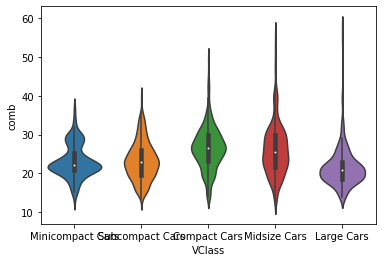

In [10]:
sb.violinplot(data=fuel_econ, x='VClass', y='comb');


> Example 2. Violin plot without datapoints in the violin interior


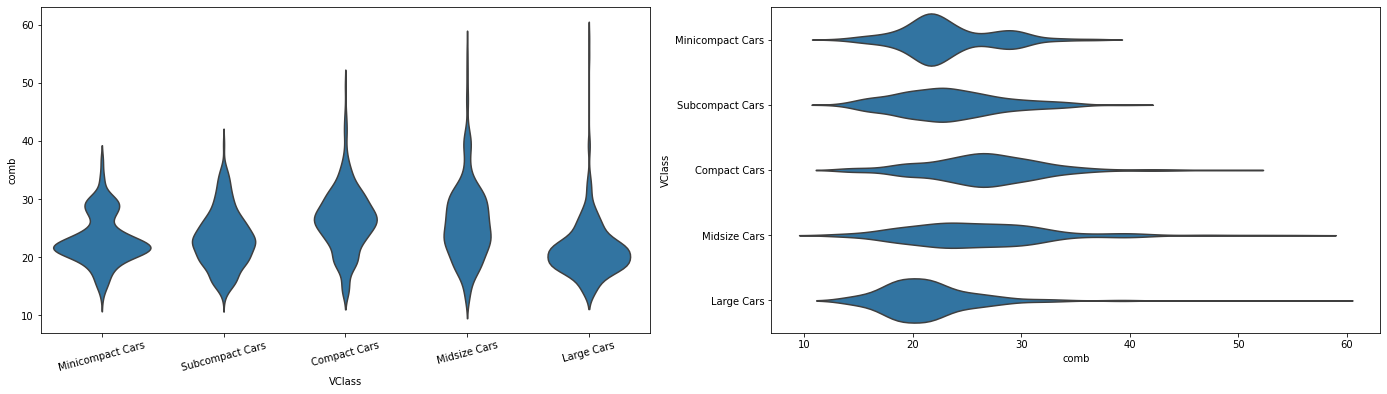

In [20]:
base_color=sb.color_palette()[0]

plt.figure(figsize=[24,6])

plt.subplot(1,2,1)
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner=None)
plt.xticks(rotation=15)

plt.subplot(1,2,2)
sb.violinplot(data=fuel_econ, x='comb', y='VClass', color=base_color, inner=None);

<AxesSubplot:xlabel='VClass', ylabel='comb'>

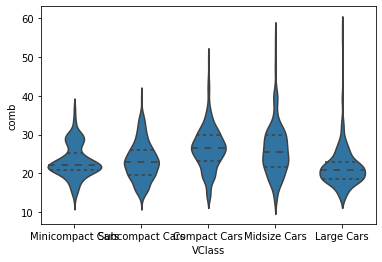

In [23]:
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile')